<a href="https://colab.research.google.com/github/jseeun00/ESAA_2021-2/blob/main/16%EC%A3%BC%EC%B0%A8_%ED%95%84%EC%82%AC2_8_%EC%B0%A8%EC%9B%90%EC%B6%95%EC%86%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PCA Analysis for GeneClassification**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ESAA/16주차/data_set_ALL_AML_train.csv.zip')
df.head()

,Gene Description,Gene Accession Number,1,call,2,call.1,3,call.2,4,call.3,5,call.4,6,call.5,7,call.6,8,call.7,9,call.8,10,call.9,11,call.10,12,call.11,13,call.12,14,call.13,15,call.14,16,call.15,17,call.16,18,call.17,19,call.18,20,call.19,21,call.20,22,call.21,23,call.22,24,call.23,25,call.24,26,call.25,27,call.26,34,call.27,35,call.28,36,call.29,37,call.30,38,call.31,28,call.32,29,call.33,30,call.34,31,call.35,32,call.36,33,call.37
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,A,-139,A,-76,A,-135,A,-106,A,-138,A,-72,A,-413,A,5,A,-88,A,-165,A,-67,A,-92,A,-113,A,-107,A,-117,A,-476,A,-81,A,-44,A,17,A,-144,A,-247,A,-74,A,-120,A,-81,A,-112,A,-273,A,-20,A,7,A,-213,A,-25,A,-72,A,-4,A,15,A,-318,A,-32,A,-124,A,-135,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,A,-73,A,-49,A,-114,A,-125,A,-85,A,-144,A,-260,A,-127,A,-105,A,-155,A,-93,A,-119,A,-147,A,-72,A,-219,A,-213,A,-150,A,-51,A,-229,A,-199,A,-90,A,-321,A,-263,A,-150,A,-233,A,-327,A,-207,A,-100,A,-252,A,-20,A,-139,A,-116,A,-114,A,-192,A,-49,A,-79,A,-186,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,A,-1,A,-307,A,265,A,-76,A,215,A,238,A,7,A,106,A,42,A,-71,A,84,A,-31,A,-118,A,-126,A,-50,A,-18,A,-119,A,100,A,79,A,-157,A,-168,A,-11,A,-114,A,-85,A,-78,A,-76,A,-50,A,-57,A,136,A,124,A,-1,A,-125,A,2,A,-95,A,49,A,-37,A,-70,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,A,283,A,309,A,12,A,168,A,71,A,55,A,-2,A,268,A,219,M,82,A,25,A,173,A,243,M,149,A,257,A,301,A,78,A,207,A,218,A,132,A,-24,A,-36,A,255,A,316,A,54,A,81,A,101,A,132,A,318,A,325,A,392,P,241,A,193,A,312,A,230,P,330,A,337,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,A,-264,A,-376,A,-419,A,-230,A,-272,A,-399,A,-541,A,-210,A,-178,A,-163,A,-179,A,-233,A,-127,A,-205,A,-218,A,-403,A,-152,A,-146,A,-262,A,-151,A,-308,A,-317,A,-342,A,-418,A,-244,A,-439,A,-369,A,-377,A,-209,A,-396,A,-324,A,-191,A,-51,A,-139,A,-367,A,-188,A,-407,A


In [3]:
df1 = [col for col in df.columns if "call" not in col]
df = df[df1]
df.head()

,Gene Description,Gene Accession Number,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,34,35,36,37,38,28,29,30,31,32,33
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,-139,-76,-135,-106,-138,-72,-413,5,-88,-165,-67,-92,-113,-107,-117,-476,-81,-44,17,-144,-247,-74,-120,-81,-112,-273,-20,7,-213,-25,-72,-4,15,-318,-32,-124,-135
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,-73,-49,-114,-125,-85,-144,-260,-127,-105,-155,-93,-119,-147,-72,-219,-213,-150,-51,-229,-199,-90,-321,-263,-150,-233,-327,-207,-100,-252,-20,-139,-116,-114,-192,-49,-79,-186
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,-1,-307,265,-76,215,238,7,106,42,-71,84,-31,-118,-126,-50,-18,-119,100,79,-157,-168,-11,-114,-85,-78,-76,-50,-57,136,124,-1,-125,2,-95,49,-37,-70
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,283,309,12,168,71,55,-2,268,219,82,25,173,243,149,257,301,78,207,218,132,-24,-36,255,316,54,81,101,132,318,325,392,241,193,312,230,330,337
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,-264,-376,-419,-230,-272,-399,-541,-210,-178,-163,-179,-233,-127,-205,-218,-403,-152,-146,-262,-151,-308,-317,-342,-418,-244,-439,-369,-377,-209,-396,-324,-191,-51,-139,-367,-188,-407


In [4]:
df.T.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,7089,7090,7091,7092,7093,7094,7095,7096,7097,7098,7099,7100,7101,7102,7103,7104,7105,7106,7107,7108,7109,7110,7111,7112,7113,7114,7115,7116,7117,7118,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
Gene Description,AFFX-BioB-5_at (endogenous control),AFFX-BioB-M_at (endogenous control),AFFX-BioB-3_at (endogenous control),AFFX-BioC-5_at (endogenous control),AFFX-BioC-3_at (endogenous control),AFFX-BioDn-5_at (endogenous control),AFFX-BioDn-3_at (endogenous control),AFFX-CreX-5_at (endogenous control),AFFX-CreX-3_at (endogenous control),AFFX-BioB-5_st (endogenous control),AFFX-BioB-M_st (endogenous control),AFFX-BioB-3_st (endogenous control),AFFX-BioC-5_st (endogenous control),AFFX-BioC-3_st (endogenous control),AFFX-BioDn-5_st (endogenous control),AFFX-BioDn-3_st (endogenous control),AFFX-CreX-5_st (endogenous control),AFFX-CreX-3_st (endogenous control),hum_alu_at (miscellaneous control),AFFX-DapX-5_at (endogenous control),AFFX-DapX-M_at (endogenous control),AFFX-DapX-3_at (endogenous control),AFFX-LysX-5_at (endogenous control),AFFX-LysX-M_at (endogenous control),AFFX-LysX-3_at (endogenous control),AFFX-PheX-5_at (endogenous control),AFFX-PheX-M_at (endogenous control),AFFX-PheX-3_at (endogenous control),AFFX-ThrX-5_at (endogenous control),AFFX-ThrX-M_at (endogenous control),AFFX-ThrX-3_at (endogenous control),AFFX-TrpnX-5_at (endogenous control),AFFX-TrpnX-M_at (endogenous control),AFFX-TrpnX-3_at (endogenous control),AFFX-HUMISGF3A/M97935_5_at (endogenous control),AFFX-HUMISGF3A/M97935_MA_at (endogenous control),AFFX-HUMISGF3A/M97935_MB_at (endogenous control),AFFX-HUMISGF3A/M97935_3_at (endogenous control),AFFX-HUMRGE/M10098_5_at (endogenous control),AFFX-HUMRGE/M10098_M_at (endogenous control),...,GB DEF = SPR2-1 gene for small proline rich pr...,Metallothionein,GB DEF = Glutamate dehydrogenase,PRSS3 Protease; serine; 3 (trypsin 3),GB DEF = Transmembrane protein Tmp21-IIex,GB DEF = H2B/h gene,ACTB Actin; beta,GAPD Glyceraldehyde-3-phosphate dehydrogenase,CYTOCHROME P450 IA2,Nkat2b mRNA,Natural killer cell receptor (KIR) mRNA,Major Histocompatibility Complex; Class I; C (...,HLA-A MHC class I protein HLA-A (HLA-A28;-B40;...,PRB2 locus salivary proline-rich protein mRNA;...,HLA CLASS II HISTOCOMPATIBILITY ANTIGEN; DQ(W1...,GB DEF = (HLCC85) mRNA for voltage-dependent L...,GB DEF = Endogenous retrovirus clone P1.8 poly...,Integrase gene extracted from Human endogenous...,WUGSC:GS345D13.2 gene (G-protein gamma-1 subun...,TIAL1 TIA1 cytotoxic granule-associated RNA-bi...,Ras-Specific Guanine Nucleotide-Releasing Factor,TYROSINE-PROTEIN KINASE ITK/TSK,(clone p4) 50 kD dystrophin-associated glycopr...,Ifp35 gene extracted from Human BRCA1; Rho7 an...,INHA Inhibin; alpha,S100A9 S100 calcium-binding protein A9 (calgra...,PLGL Plasminogen-like protein,ID1 Inhibitor of DNA binding 1; dominant negat...,ABP1 Amiloride binding protein 1 (amine oxidas...,Transcriptional activator hSNF2b,Transcription factor Stat5b (stat5b) mRNA,Breast epithelial antigen BA46 mRNA,GB DEF = Calcium/calmodulin-dependent protein ...,TUBULIN ALPHA-4 CHAIN,CYP4B1 Cytochrome P450; subfamily IVB; polypep...,PTGER3 Prostaglandin E receptor 3 (subtype EP3...,HMG2 High-mobility group (nonhistone chromosom...,RB1 Retinoblastoma 1 (including osteosarcoma),GB DEF = Glycophorin Sta (type A) exons 3 and ...,GB DEF = mRNA (clone 1A7)
Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,AFFX-BioB-M_st,AFFX-BioB-3_st,AFFX-BioC-5_st,AFFX-BioC-3_st,AFFX-BioDn-5_st,AFFX-BioDn-3_st,AFFX-CreX-5_st,AFFX-CreX-3_st,hum_alu_at,AFFX-DapX-5_at,AFFX-DapX-M_at,AFFX-DapX-3_at,AFFX-LysX-5_at,AFFX-LysX-M_at,AFFX-LysX-3_at,AFFX-PheX-5_at,AFFX-PheX-M_at,AFFX-PheX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-ThrX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,AFFX-TrpnX-

In [5]:
df = df.T
df2 = df.drop(['Gene Description','Gene Accession Number'],axis=0)
df2.index = pd.to_numeric(df2.index)
df2.sort_index(inplace=True)
df2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,7089,7090,7091,7092,7093,7094,7095,7096,7097,7098,7099,7100,7101,7102,7103,7104,7105,7106,7107,7108,7109,7110,7111,7112,7113,7114,7115,7116,7117,7118,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
1,-214,-153,-58,88,-295,-558,199,-176,252,206,-41,-831,-653,-462,75,381,-118,-565,15091,7,311,-231,21,-107,165,-78,-204,29,-61,-105,-366,-41,-346,-297,-109,-13,215,797,14538,9738,...,391,-763,172,149,341,788,21210,13771,598,396,245,14476,10882,701,2762,-325,-67,346,-68,229,-14,108,28,349,61,273,384,-306,-1827,1582,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,19,-743,-239,-83,182,164,-141,-423,11038,37,134,-161,-21,-180,18,-120,-65,97,15,-49,-330,-41,-772,-259,-192,-219,116,433,615,115,...,200,51,154,418,433,736,21059,15097,563,171,-149,13686,11789,76,1567,-191,-88,290,14,194,56,303,-242,214,-28,143,231,-336,-2380,624,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,19,-1135,-962,-232,208,432,84,-501,16692,183,378,-221,67,-203,238,-124,-161,36,-23,-80,-481,-65,-620,-269,-136,104,476,1474,5669,3272,...,387,-474,180,272,591,959,24292,17378,1808,363,325,6560,5023,804,1090,-258,9,220,-58,294,95,143,-25,464,513,238,720,-204,-1772,753,315,1199,33,168,52,1138,777,41,228,-41
4,-135,-114,265,12,-419,-585,158,-253,49,31,363,-934,-577,-214,142,271,-107,-101,15763,45,268,-27,43,-52,247,-116,-208,22,-10,-74,-240,-33,-560,-261,-366,-148,155,415,4850,2293,...,317,-336,325,149,173,431,17558,13818,576,455,594,8955,9567,367,1708,-357,45,430,-35,128,42,22,-131,342,142,277,307,-320,-2022,743,240,835,218,174,-110,627,170,-50,126,-91
5,-106,-125,-76,168,-230,-284,4,-122,70,252,155,-471,-490,-184,32,213,1,-260,18128,-28,118,-153,-8,-111,44,-88,-102,32,5,-18,-228,53,-348,-169,-156,-55,122,483,1284,2731,...,162,-56,279,183,259,605,18530,15619,65,122,126,8443,8512,182,1503,-78,29,159,18,71,42,44,-33,159,71,134,178,-182,-179,626,156,649,57,504,-26,250,314,14,56,-25


In [6]:
df2['cat'] = list(pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ESAA/16주차/actual.csv')[:38]['cancer'])
dic = {'ALL':0,'AML':1}
df2.replace(dic,inplace=True)
df2.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,7090,7091,7092,7093,7094,7095,7096,7097,7098,7099,7100,7101,7102,7103,7104,7105,7106,7107,7108,7109,7110,7111,7112,7113,7114,7115,7116,7117,7118,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128,cat
1,-214,-153,-58,88,-295,-558,199,-176,252,206,-41,-831,-653,-462,75,381,-118,-565,15091,7,311,-231,21,-107,165,-78,-204,29,-61,-105,-366,-41,-346,-297,-109,-13,215,797,14538,9738,...,-763,172,149,341,788,21210,13771,598,396,245,14476,10882,701,2762,-325,-67,346,-68,229,-14,108,28,349,61,273,384,-306,-1827,1582,185,511,-125,389,-37,793,329,36,191,-37,0
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,19,-743,-239,-83,182,164,-141,-423,11038,37,134,-161,-21,-180,18,-120,-65,97,15,-49,-330,-41,-772,-259,-192,-219,116,433,615,115,...,51,154,418,433,736,21059,15097,563,171,-149,13686,11789,76,1567,-191,-88,290,14,194,56,303,-242,214,-28,143,231,-336,-2380,624,169,837,-36,442,-17,782,295,11,76,-14,0
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,19,-1135,-962,-232,208,432,84,-501,16692,183,378,-221,67,-203,238,-124,-161,36,-23,-80,-481,-65,-620,-269,-136,104,476,1474,5669,3272,...,-474,180,272,591,959,24292,17378,1808,363,325,6560,5023,804,1090,-258,9,220,-58,294,95,143,-25,464,513,238,720,-204,-1772,753,315,1199,33,168,52,1138,777,41,228,-41,0


##**PCA analysis**

In [7]:
from sklearn.preprocessing import StandardScaler # 표준화 패키지 라이브러리 
X_std = StandardScaler().fit_transform(df2.drop('cat',axis=1)) #'cat' 열 삭제한 df2를 평균 0, 분산 1로 표준화한 데이터를 X_std에 저장

from sklearn.decomposition import PCA as sklearnPCA 
sklearn_pca = sklearnPCA(n_components=30) #n_components: PCA로 변환할 차원의 수

#fit()과 transform()을 호출해 PCA로 변환 데이터 반환
Y_sklearn = sklearn_pca.fit_transform(X_std)

In [8]:
cum_sum = sklearn_pca.explained_variance_ratio_.cumsum()  #누적합
#explained_variance_ratio_: 내가 설정한 n_components의 개수로 전체 데이터의 분산을 얼마만큼 설명 가능한지 알 수 있다. 

sklearn_pca.explained_variance_ratio_[:10].sum() #10개의 주성분이 전체 분산의 약 59.2를 설명한다. 


0.592167896248634

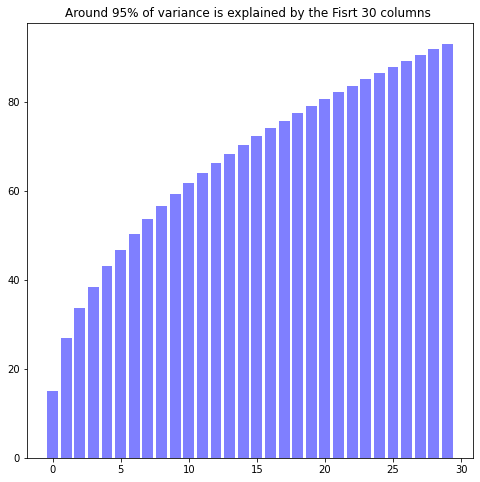

In [11]:
cum_sum = cum_sum*100 

fig, ax = plt.subplots(figsize=(8,8))
plt.bar(range(30), cum_sum, label='Cumulative _Sum_of_Explained _Variance', color = 'b',alpha=0.5)
plt.title("Around 95% of variance is explained by the Fisrt 30 columns ");

In [12]:
X_reduced2 = Y_sklearn

In [13]:
df2.cat.values #독립변수 cat의 값

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [14]:
train = pd.DataFrame(X_reduced2) #변환된 차원으로 이루어진 데이터 프레임 구성
train['cat'] =  df2['cat'].reset_index().cat #인덱스를 처음부터 재배열
train.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,cat
0,18.544799,5.826943,-19.442313,-11.267566,5.303304,19.100937,-9.447438,0.915309,-8.665217,-7.912754,-12.589082,9.984480,11.383603,-10.315255,-11.023694,21.856659,33.668830,27.585665,-9.709952,6.898137,-6.697653,6.323438,5.630107,-4.538090,-14.672156,4.899964,9.335462,-12.552358,2.484640,12.217094,0
1,-7.341389,10.008663,11.795698,3.920823,-13.999094,-18.636026,4.687060,8.812418,1.372678,-11.690751,5.534990,2.541037,24.461860,-10.402287,-14.526425,-18.522092,-16.812957,10.856530,0.709630,-9.222620,5.596218,-11.423156,-10.669290,-5.364779,-20.280586,7.685347,23.676243,5.216321,17.828269,-1.015588,0
2,52.852146,11.390630,-29.548566,-38.800348,-22.866689,-9.458113,-22.880735,20.995112,4.038731,-5.260765,3.744643,13.567964,-4.857145,-19.100834,-5.261137,29.061348,-18.011722,-23.222426,8.224768,-14.644300,5.996148,1.847696,5.073579,0.797486,0.995521,-0.354742,-0.093794,2.769450,-2.868344,7.354274,0


[]

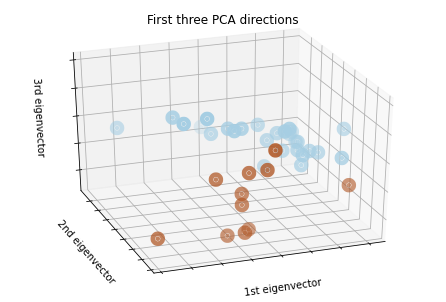

In [20]:
#PCA가 데이터에 어떤 역할을 하는지 간략하게 보기 위해 3차원으로 줄이고 있지만, 최종 모델링에서는 30차원을 사용할 것이다.
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=3) #3차원으로 설정
X_reduced  = sklearn_pca.fit_transform(X_std)
Y=train['cat']

from mpl_toolkits.mplot3d import Axes3D #3차원 공간에서 데이터 시각화 위해
plt.clf() #전체 그림 지우기
fig = plt.figure(1, figsize=(10,6))
ax = Axes3D(fig, elev=-150, azim=110) #elev: z면의 각도, azim: x, y면의 각도
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=Y,cmap=plt.cm.Paired,linewidths=10) 
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

Text(0.5, 1.0, 'This The 2D Transformation of above graph ')

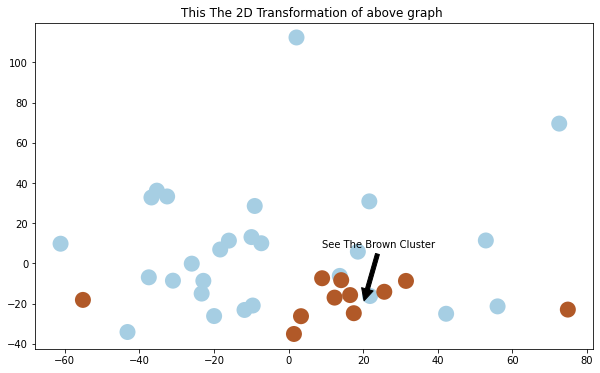

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(1, figsize=(10,6))
plt.scatter(X_reduced[:, 0],  X_reduced[:, 1], c=df2['cat'],cmap=plt.cm.Paired,linewidths=10)
plt.annotate('See The Brown Cluster',xy=(20,-20),xytext=(9,8),arrowprops=dict(facecolor='black', shrink=0.05))
#plt.scatter(test_reduced[:, 0],  test_reduced[:, 1],c='r')
plt.title("This The 2D Transformation of above graph ")

In [14]:
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ESAA/16주차/data_set_ALL_AML_independent.csv.zip')

test.head(3)

,Gene Description,Gene Accession Number,39,call,40,call.1,42,call.2,47,call.3,48,call.4,49,call.5,41,call.6,43,call.7,44,call.8,45,call.9,46,call.10,70,call.11,71,call.12,72,call.13,68,call.14,69,call.15,67,call.16,55,call.17,56,call.18,59,call.19,52,call.20,53,call.21,51,call.22,50,call.23,54,call.24,57,call.25,58,call.26,60,call.27,61,call.28,65,call.29,66,call.30,63,call.31,64,call.32,62,call.33
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-342,A,-87,A,22,A,-243,A,-130,A,-256,A,-62,A,86,A,-146,A,-187,A,-56,A,-55,A,-59,A,-131,A,-154,A,-79,A,-76,A,-34,A,-95,A,-12,A,-21,A,-202,A,-112,A,-118,A,-90,A,-137,A,-157,A,-172,A,-47,A,-62,A,-58,A,-161,A,-48,A,-176,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-200,A,-248,A,-153,A,-218,A,-177,A,-249,A,-23,A,-36,A,-74,A,-187,A,-43,A,-44,A,-114,A,-126,A,-136,A,-118,A,-98,A,-144,A,-118,A,-172,A,-13,A,-274,A,-185,A,-142,A,-87,A,-51,A,-370,A,-122,A,-442,A,-198,A,-217,A,-215,A,-531,A,-284,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,41,A,262,A,17,A,-163,A,-28,A,-410,A,-7,A,-141,A,170,A,312,A,43,A,12,A,23,A,-50,A,49,A,-30,A,-153,A,-17,A,59,A,12,A,8,A,59,A,24,A,212,A,102,A,-82,A,-77,A,38,A,-21,A,-5,A,63,A,-46,A,-124,A,-81,A


In [18]:
test1 = [col for col in test.columns if "call" not in col]
test = test[test1]
test = test.T
test2 = test.drop(['Gene Description','Gene Accession Number'],axis=0)
test2.index = pd.to_numeric(test2.index)
test2.sort_index(inplace=True)
#test2['cat'] = list(pd.read_csv('actual.csv')[39:63]['cancer'])
#dic = {'ALL':0,'AML':1}
#test2.replace(dic,inplace=True)
#test2

In [19]:
from sklearn.preprocessing import StandardScaler
Y_std = StandardScaler().fit_transform(test2)

from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=30)
test_reduced = sklearn_pca.fit_transform(Y_std)

In [20]:
test_set = pd.DataFrame(test_reduced)

test_set.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,15.954485,-19.998344,34.450819,17.107265,-14.499998,-8.547010,-27.011502,0.893890,28.760512,-11.761661,13.041420,-2.789661,45.659671,-0.394495,10.114546,-17.379584,-13.815579,11.853946,4.010006,1.182597,12.181201,-1.930483,-5.577590,0.894264,1.708536,9.909458,1.429599,-1.368022,1.928401,1.395269
1,22.690962,-17.487396,-28.042792,26.803369,-12.457292,12.704222,35.329067,20.194094,43.420264,28.037366,-33.388424,1.310340,8.530592,0.313179,-16.274469,8.305425,-2.201507,-4.505882,2.225433,5.491816,3.671538,3.183151,0.897244,0.113003,0.708739,1.036280,4.038658,0.821032,1.411593,1.400042
2,-36.249932,13.988727,-8.697312,10.075214,6.067020,-3.396009,3.167661,13.144338,-3.474793,-5.183876,3.405637,12.559989,-1.192775,-16.642691,-1.135126,-8.165521,-2.861824,9.131398,-2.115437,-1.653806,-4.041182,-8.274781,13.887254,-6.468673,-6.302675,-11.033458,-5.795327,-7.775089,-8.975263,11.639648


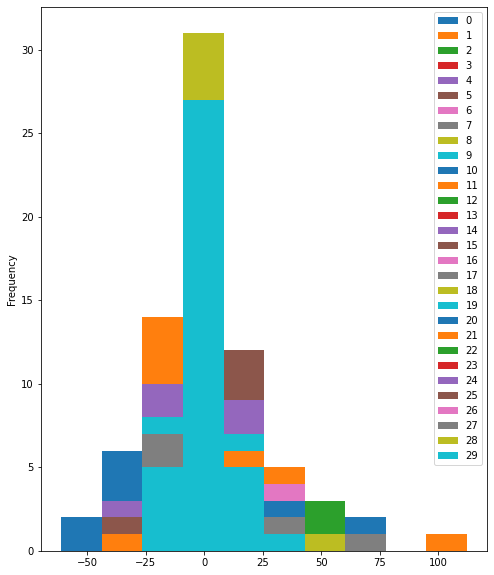

In [21]:
train.drop('cat',axis=1).plot(kind='hist',figsize=(8,10))

In [22]:
from sklearn.neighbors import KNeighborsClassifier
clf= KNeighborsClassifier(n_neighbors=10,)
clf.fit(train.drop('cat',axis=1),train['cat'])

KNeighborsClassifier(n_neighbors=10)

In [24]:
pred = clf.predict(test_set)

pateint = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ESAA/16주차/actual.csv')['cancer'][38:]

true = pateint.replace(dic)

import sklearn
sklearn.metrics.confusion_matrix(true, pred)

array([[19,  1],
       [13,  1]])

In [25]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(min_samples_split=2)
clf.fit(train.drop('cat',axis=1),train['cat'])
pred = clf.predict(test_set)
true = pateint.replace(dic)
print(sklearn.metrics.confusion_matrix(true, pred))
print()

[[13  7]
 [10  4]]



In [29]:
from sklearn import svm

clf=svm.SVC(kernel='linear')
clf.fit(train.drop('cat',axis=1),train['cat'])
pred = clf.predict(test_set)

pateint = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ESAA/16주차/actual.csv')['cancer'][38:]

true = pateint.replace(dic)

print(sklearn.metrics.confusion_matrix(true, pred))
print()

[[16  4]
 [13  1]]



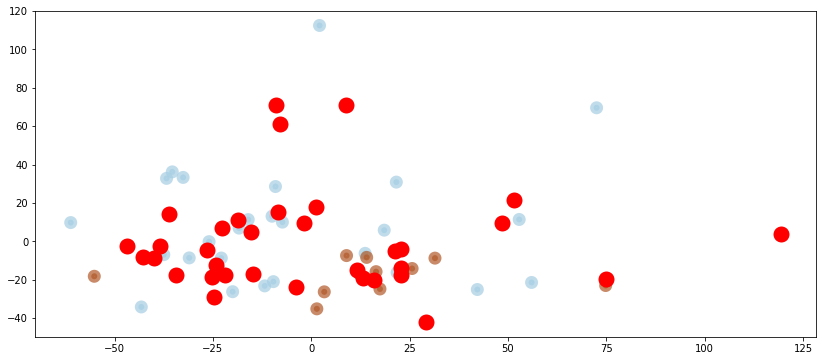

In [30]:
fig = plt.figure(1, figsize=(14,6))
plt.scatter(X_reduced[:, 0],  X_reduced[:, 1], c=df2['cat'],cmap=plt.cm.Paired,alpha=0.7,linewidths=7)
plt.scatter(test_reduced[:, 0],  test_reduced[:, 1],c='r',linewidths=10)